In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Benchmark1_for_rearr as Benchmark1
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=150, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=16, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=1, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=38, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=22, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="uct",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

benchmark1 = Benchmark1(
    robot_name="panda", geom="visual", is_pyplot=False, box_num=6
)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-08-12 02:38:16.497758: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-79279ef4-1a2f-4520-b13f-ebda16758096.json


*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('D_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=E_box, pos=[0.8        0.         0.88329998])]}),
             ('E_box',
              {'on': Object(name=D_box, pos=[0.8        0.         0.83329998]),
               'support': [Object(name=F_box, pos=[0.8        0.         0.93429998])]}),
             ('F_box',
              {'on': Object(name=E_box, pos=[0.8        0.         0.88329998])}),
             ('tray_red', {'static': True}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0

In [2]:
# # # # #######################
# fig, ax = p_utils.init_3d_figure(name="Benchamrk 1")
# # init_scene
# benchmark1.scene_mngr.render_scene(ax)
# benchmark1.render_axis(benchmark1.scene_mngr)
# benchmark1.scene_mngr.show()


In [3]:
c = 3
idx = 0
mcts = MCTS_rearrangement(
    scene_mngr=benchmark1.scene_mngr,
    init_scene=benchmark1.init_scene,
    sampling_method=algo,
    budgets=budgets,
    max_depth=max_depth,
    c=c,
    debug_mode=False,
    use_pick_action=False,
    consider_next_scene=False, 
)

mcts.only_optimize_1 = False 
mcts._do_level_2 = True

2023-08-12 02:38:18.449789: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-12 02:38:18.510926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-12 02:38:18.511072: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-12 02:38:18.511094: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-12 02:38:18.513967: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-12 02:38:18.514004: I tensorflow/strea

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-12 02:38:22.066432: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 02:38:22.067175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-12 02:38:22.067323: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Ti Laptop GPU computeCapability: 8.6
coreClock: 1.485GHz coreCount: 20 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-12 02:38:22.067422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negati

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-12 02:38:22.399874: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-12 02:38:22.399906: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-12 02:38:22.399912: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-12 02:38:22.400153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-12 02:38:22.400357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-12 02:38:22.400491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [4]:
# sup_obj_name = None
# list(mcts.rearr_action.get_arbitrary_location('A_box', support_obj_name=sup_obj_name,scene_for_sample=mcts.init_scene, sample_num= 1))[0]

In [5]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {benchmark1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 1, Algo: uct, C: 3, Seed: 22
=========== Search iteration : 1 ===========
[Action] Rearr C_box to tray_red
[Reward] S(0) -> A(3) -> S'(6) Reward : -0.1
[Action] Rearr F_box to C_box
[Reward] S(6) -> A(10) -> S'(11) Reward : -0.1
[Action] Rearr B_box to F_box
[Reward] S(11) -> A(13) -> S'(15) Reward : -0.1
[Action] Rearr E_box to table
[Reward] S(15) -> A(17) -> S'(19) Reward : -0.1
[Action] Rearr B_box to table
[Reward] S(19) -> A(21) -> S'(24) Reward : -0.1
[Action] Rearr E_box to F_box
[Reward] S(24) -> A(27) -> S'(29) Reward : -0.1
[Action] Rearr A_box to E_box
[Reward] S(29) -> A(30) -> S'(33) Reward : -0.1
[Action] Rearr D_box to A_box
[Reward] S(33) -> A(35) -> S'(36) Reward : -0.1
[Action] Rearr B_box to D_box
[Reward] S(36) -> A(37) -> S'(38) Reward : -0.1
Current logical action is None.. Reward is -2.2222222222222223
[Reward] S(38) -> A(None) -> S'(None) Reward : -2.222
last max  value level 1 : 0
########### Running time :  0.6980068683624268 ##############

KeyboardInterrupt: 

In [ ]:
for i in mcts.tree.neighbors(0):
    print(i)

In [13]:
mcts.tree.nodes[7]['depth']

2

In [33]:
max_level_1_value = mcts.values_for_level_1[-1]
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

16.17857142857143 {0: {'nodes': [0, 1, 25, 29, 128, 129, 162, 163, 224, 225, 362, 363, 391, 392, 400, 401, 402], 'value': 16.17857142857143}}

Result 0 :  [0, 1, 25, 29, 128, 129, 162, 163, 224, 225, 362, 363, 391, 392, 400, 401, 402]
state num : 17


: 

In [29]:
mcts.history_level_2_dict

{0: {'nodes': [0,
   1,
   25,
   29,
   128,
   129,
   162,
   163,
   224,
   225,
   362,
   363,
   391,
   392,
   400,
   401,
   402],
  'value': 16.550671}}

In [32]:
mcts.values_for_level_1[-1]

16.17857142857143

In [65]:
mcts.time_used_in_level_1,mcts.time_used_in_level_1_5, mcts.time_used_in_level_2

(6.10305643081665, 3.089899778366089, 128.79576587677002)

In [66]:
mcts.tree.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [67]:
mcts.get_visit_node_num()

211

In [42]:
mcts.tree.nodes[0]['value']

2.3666666666666654

In [43]:
mcts.history_level_2_dict

{0: {'nodes': [0,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   34,
   35,
   63,
   64,
   101,
   102,
   105,
   106,
   108,
   109,
   110],
  'value': 14.165549}}

In [23]:
mcts.infeasible_sub_nodes

[]

In [24]:
max(final_level_1_values[0], )

13.75634920634921

In [25]:
mcts.tree.nodes[0]['value'] ,mcts.tree.nodes[0]['value_history'][-1]

(3.8952380952380947, -4.257142857142858)

In [26]:
final_level_1_values = []
final_level_2_values = []
final_level_1_values.append(mcts.values_for_level_1)
final_level_2_values.append(mcts.values_for_level_2)


In [27]:
final_level_1_values

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.5999999999999994,
  0.5999999999999994,
  0.5999999999999994,
  0.5999999999999994,
  0.5999999999999994,
  0.5999999999999994,
  0.5999999999999994,
  0.5999999999999994,
  0.5999999999999994,
  0.5999999999999994,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634920634921,
  13.75634

In [28]:
final_level_2_values

[[0,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  -inf,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.165549,
  14.1655

In [37]:
a = [1, 3, 5 ]

a.pop()
a

[1, 3]

In [23]:
print(mcts.tree.nodes[3])
for i in mcts.tree.neighbors(88):
    print(i)

{'depth': 1, 'state': <pytamp.scene.scene.Scene object at 0x7f4e944f0670>, 'action': {'type': 'rearr', 'rearr_obj_name': 'E_box', 'place_obj_name': 'tray_red', 'rearr_poses': [{'tray_red': array([[ 0.93621162,  0.35143678,  0.        ,  0.53407657],
       [-0.35143678,  0.93621162,  0.        , -0.47552023],
       [ 0.        ,  0.        ,  1.        ,  0.83625   ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]}, 'value': -10.2, 'value_history': [-10.2], 'visit': 1, 'number': 3, 'type': 'action', 'joints': [], 'level1': False, 'level2': False, 'level1_5': False, 'success': False, 'cost': 0, 'test': ()}
113


In [14]:
print(mcts.tree.nodes[92])


{'number': 92, 'visit': 4, 'depth': 6, 'state': <pytamp.scene.scene.Scene object at 0x7f6f84646790>, 'action': {'B_box': array([[-0.80872212,  0.5881909 ,  0.        ,  0.55227943],
       [-0.5881909 , -0.80872212,  0.        , -0.43276886],
       [ 0.        ,  0.        ,  1.        ,  0.88675   ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, 'value': -2.9000000000000004, 'value_history': [-2.9000000000000004, -3.0571428571428574, -2.9000000000000004, -2.9000000000000004], 'type': 'state', 'joints': [], 'level1': False, 'level2': False, 'level1_5': False, 'success': False, 'cost': 0, 'test': ()}


In [15]:
mcts.tree.nodes[114]['state'].logical_states

OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('B_box',
              {'on': Object(name=tray_red, pos=[ 0.6  -0.5   0.81]),
               'support': [Object(name=C_box, pos=[ 0.55895354 -0.43665233  0.88675   ])]}),
             ('C_box',
              {'on': Object(name=B_box, pos=[ 0.55580162 -0.4316468   0.83625   ])}),
             ('D_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('E_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('F_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043])}),
             ('tray_red',
              {'static': True,
               'support': [Object(name=B_box, pos=[ 0.55580162 -0.4316468   0.83625   ])]}),
             ('table',
              {'static': True,
               'support': [Object(name=A_box, pos=[0.6        0.         0.83329998]),
                Object(name=D_box, pos=

In [17]:
for i, n in enumerate(max_value_nodes):
    if i%2==1:
        print(mcts.tree.nodes[2*i-1].get("test"))

()
()
()
()
()
()
()
()
('D_box', array([[ 0.63163352, -0.77526711,  0.        ,  0.57311107],
       [ 0.77526711,  0.63163352,  0.        , -0.34768581],
       [ 0.        ,  0.        ,  1.        ,  0.83625   ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]))
()


In [24]:
max_value_nodes = mcts.get_minimum_cost_node()

In [25]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [26]:
final_pnp_all_joint_paths

[[[OrderedDict([('pre_grasp',
                 [array([ 0.06394181,  0.22769557, -0.02103424, -2.58061079,  0.05661431,
                          2.93637832, -0.70678772]),
                  array([ 0.12788362,  0.2590416 , -0.04206848, -2.54322771,  0.11322862,
                          2.93116399, -0.62817727]),
                  array([ 0.19182543,  0.29038763, -0.06310272, -2.50584462,  0.16984293,
                          2.92594966, -0.54956683]),
                  array([ 0.25576724,  0.32173366, -0.08413695, -2.46846154,  0.22645724,
                          2.92073533, -0.47095638]),
                  array([ 0.31970906,  0.35307969, -0.10517119, -2.43107846,  0.28307155,
                          2.915521  , -0.39234594]),
                  array([ 0.38365087,  0.38442572, -0.12620543, -2.39369537,  0.33968586,
                          2.91030667, -0.31373549]),
                  array([ 0.44759268,  0.41577175, -0.14723967, -2.35631229,  0.39630017,
                      

0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
600 scene
700 scene
800 scene
900 scene
1000 scene
1100 scene
1200 scene
1300 scene
1400 scene
1500 scene
1600 scene
1700 scene
1800 scene
1900 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


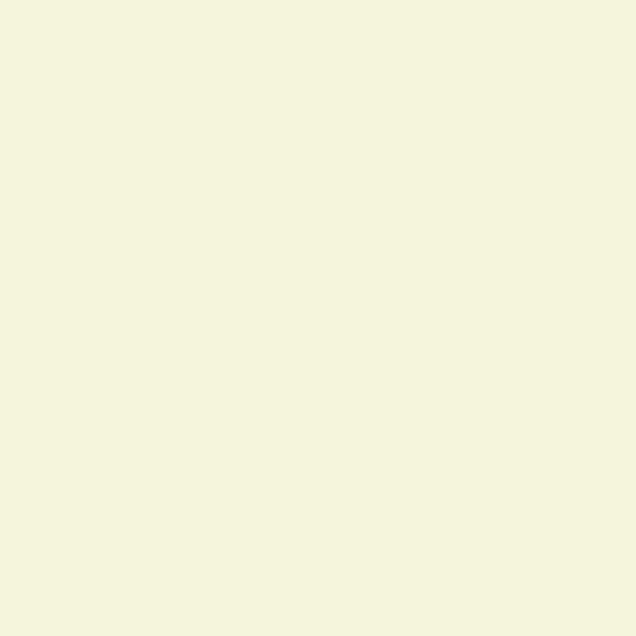

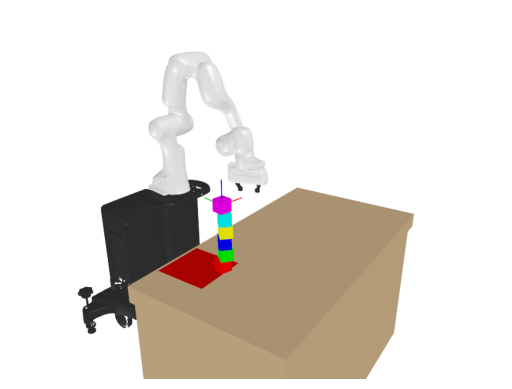

In [19]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="benchmark1_grasp_using_contact_graspnet_consider_next_scene_block_6",
)
